In [4]:
import os
import pickle
import numpy as np
import scipy as sp
from scipy import stats
from pathlib import Path
from itertools import chain
from matplotlib import pyplot as plt

data_dir = Path('../models/11_03')
segments_file = data_dir / 'segments_dict.pkl'

with open(segments_file, 'rb') as file:
    segments_dict = pickle.load(file)
    
all_segments = list(chain(*segments_dict.values()))
clusters = set([s[0] for s in all_segments])
segment_lengths_by_cluster = {c: [seg[2] for seg in all_segments if seg[0] == c] for c in clusters}

with open(data_dir / 'data_dict.pkl', 'rb') as file:
    data_dict = pickle.load(file)


In [22]:
labels = np.load(data_dir / 'labels.npy')

with open(data_dir / 'labels_dict.pkl', 'rb') as file:
    labels_dict = pickle.load(file)
print(list(labels_dict.values())[0].shape)  

labels_dict = {k: np.append(np.ones(15)*(-1), v) for k, v in labels_dict.items()}
labels_dict = {k: np.append(v, np.ones(15)*(-1)) for k, v in labels_dict.items()}
labels_dict = {k: np.repeat(v, 4) for k, v in labels_dict.items()}

list(labels_dict.values())[0][:100]

(123933,)


array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., 23., 23., 23., 23., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14., 14.,
       14., 14., 14., 14., 14., 10., 10., 10., 10.])

In [25]:
np.save(data_dir / 'labels_dict.npy', labels_dict, allow_pickle=True)
np.save(data_dir / 'segment_dict.npy', segments_dict, allow_pickle=True)

In [74]:
((ds.data[2222] - ds.data.mean(axis=0))/(ds.data.std(axis=0)+1e-18)).reshape(24, 20)

array([[-0.05835485, -0.1733523 , -0.28114052, -0.27372059, -0.17100965,
        -0.13525567, -0.02254499,  0.2218688 ,  0.60403058,  0.80705083,
         0.71762629,  0.44980282,  0.40389918,  0.44526767,  0.37427071,
         0.35095864,  0.32370973,  0.23901652,  0.45128637,  0.96139552],
       [-0.35647723, -0.42144114, -0.49603886, -0.5402917 , -0.60956601,
        -0.45999823, -0.27529439, -0.23016555, -0.23019906, -0.13570733,
        -0.16810088, -0.23977094, -0.24912212, -0.34343895, -0.47495192,
        -0.52180704, -0.55666488, -0.69471662, -0.78488495, -0.70670513],
       [ 0.46936924,  0.69111436,  0.40094698,  0.33779374,  0.36135675,
         0.20292031,  0.0445982 , -0.06199695,  0.01468654,  0.21153096,
         0.30173191,  0.20509378,  0.0672108 ,  0.16054504,  0.20543351,
         0.1680775 ,  0.10171131,  0.08917483,  0.24709959,  0.4895891 ],
       [ 0.01276004,  0.06738295,  0.1545899 ,  0.31427691,  0.44488151,
         0.3381419 ,  0.03376341, -0.19718262, -

In [7]:
list(data_dict.values())[0].shape

(123933, 720)

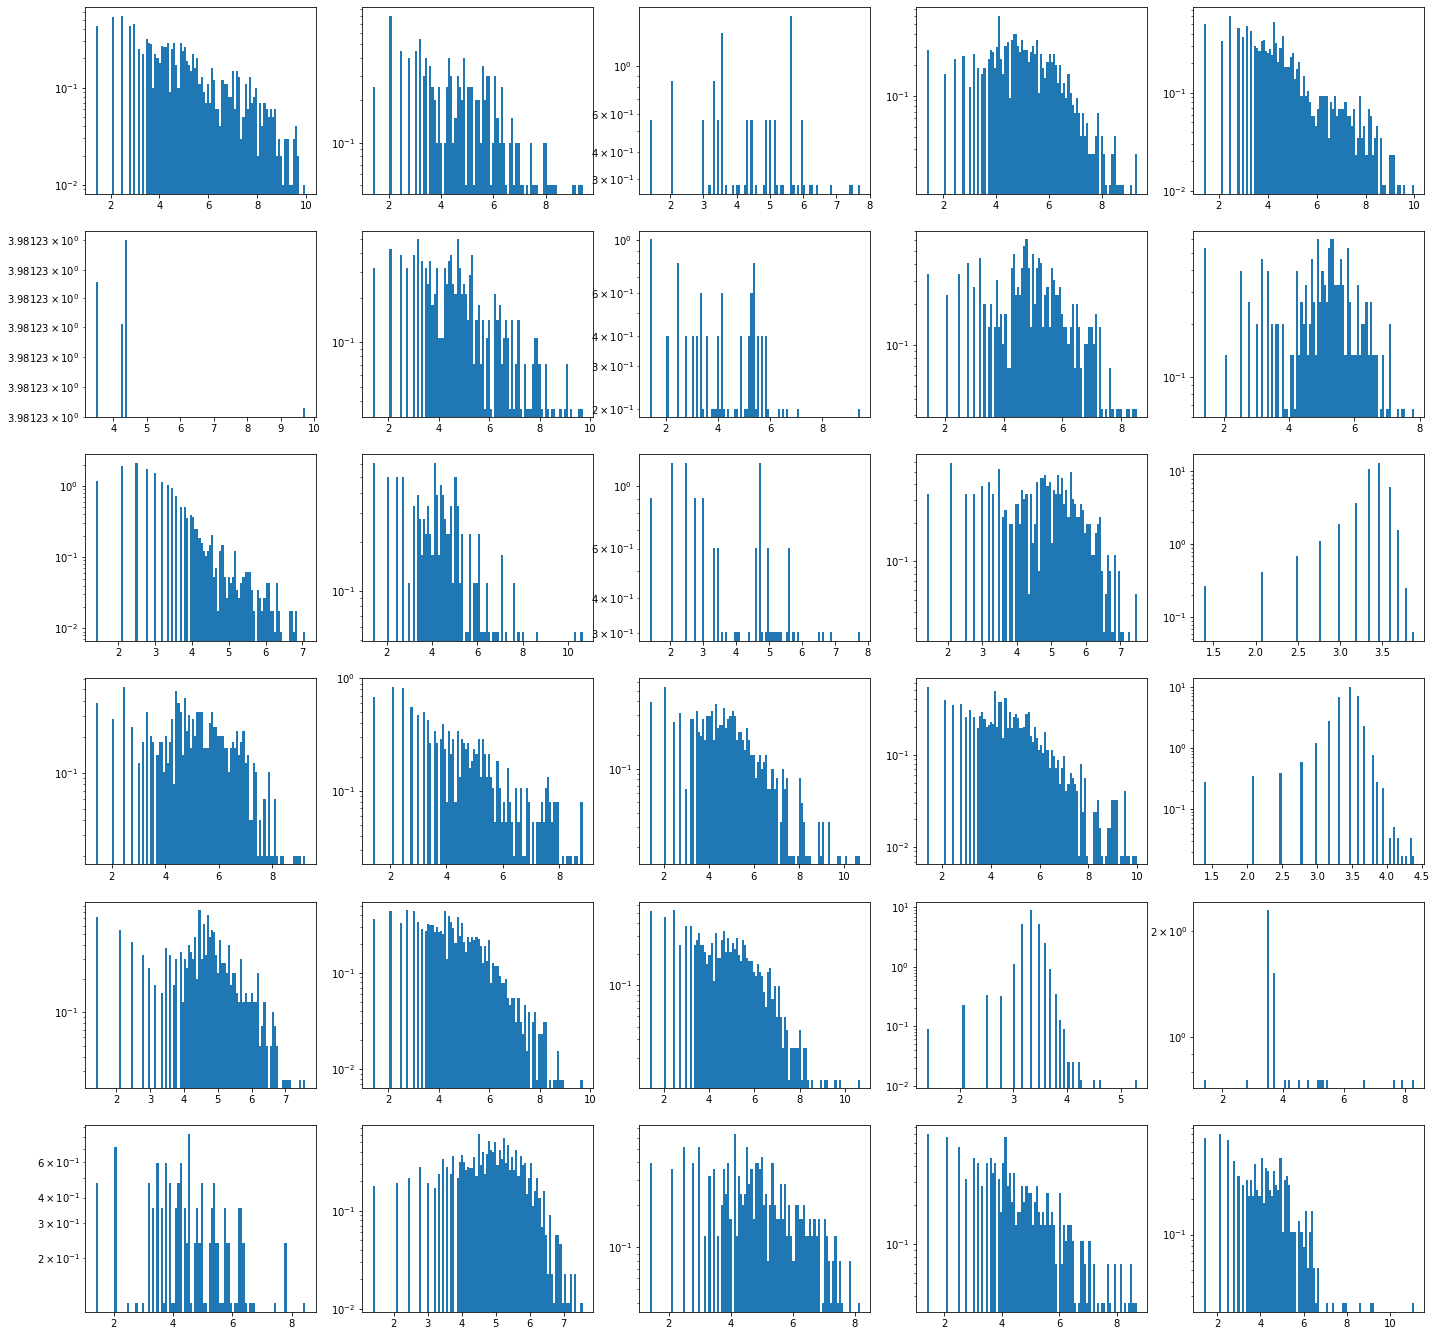

In [109]:
ncols = 5; nrows = 6
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(24, 24))

for i in range(nrows):
    for j in range(ncols):
        cluster_id = i*ncols + j
        axes[i][j].hist(np.log(segment_lengths_by_cluster[cluster_id]), bins=100, log=True, density=True)

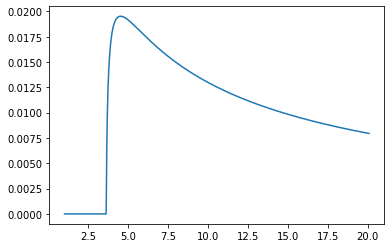

In [108]:
s, loc, scale = stats.lognorm.fit(segment_lengths_by_cluster[0], loc=0)
xs = np.exp(np.linspace(0, 3, 1000))
plt.plot(xs, stats.lognorm.pdf(xs, s, loc, scale))

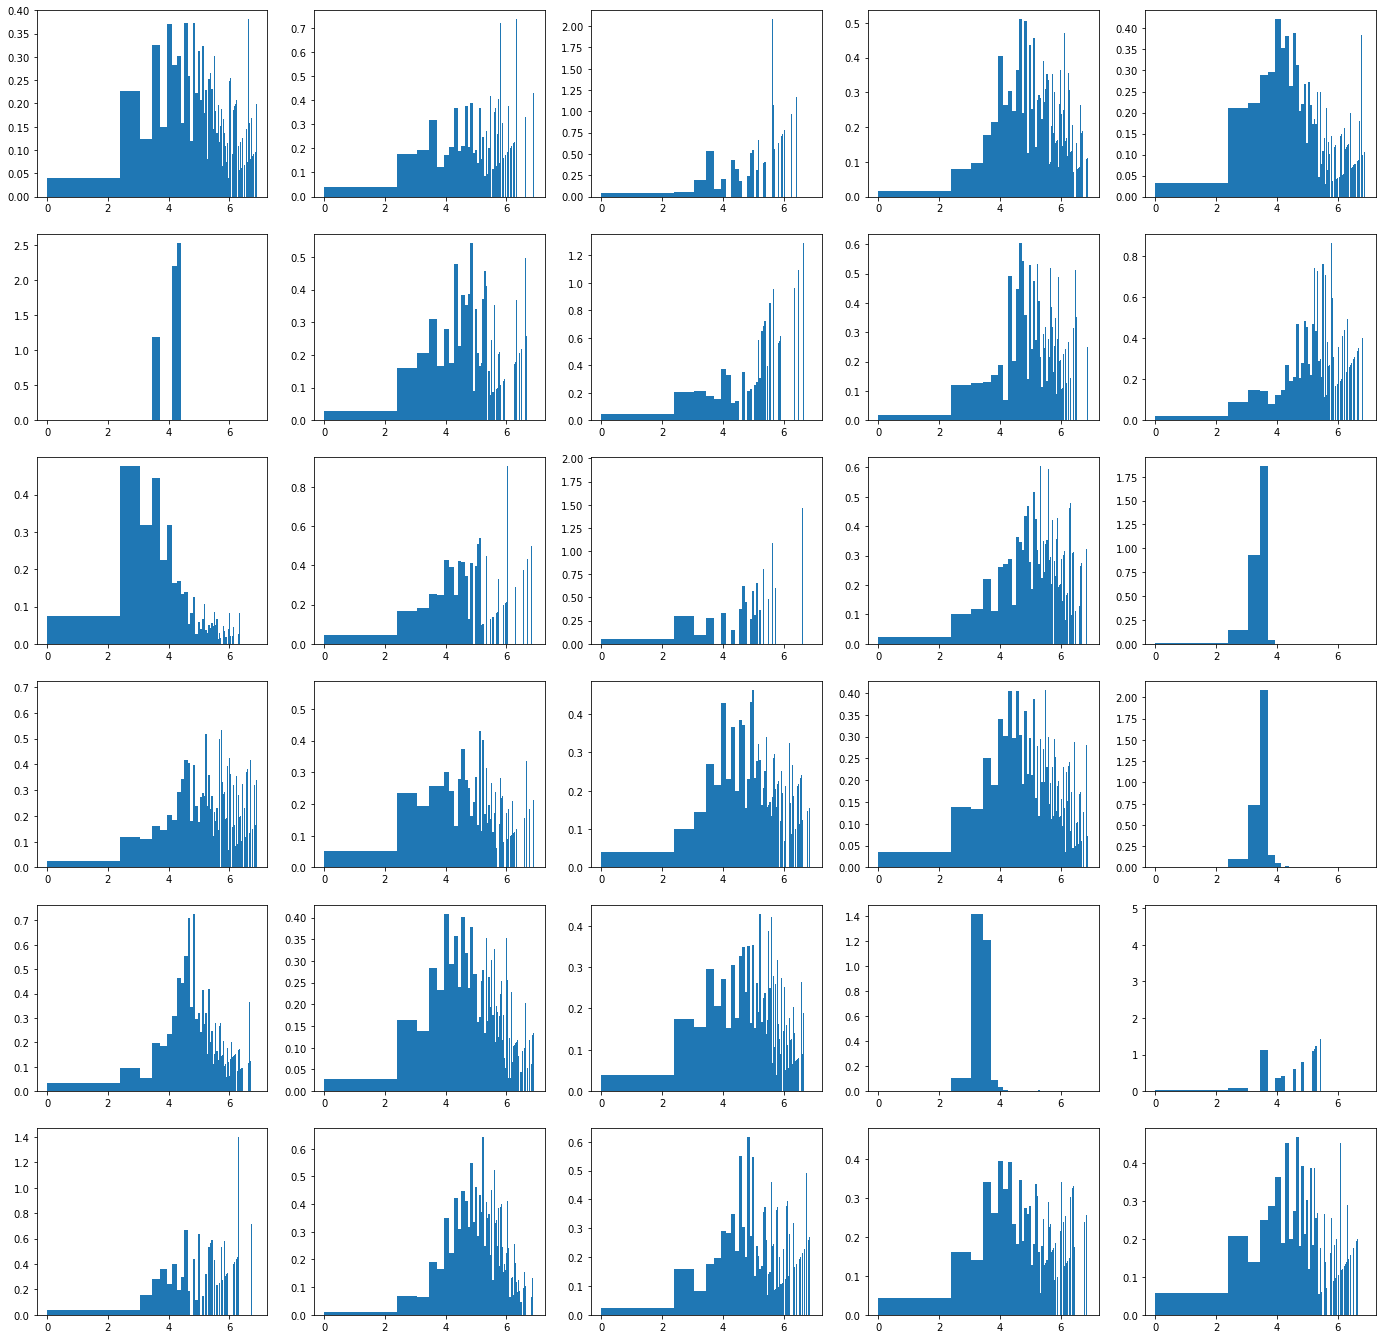

In [72]:
ncols = 5; nrows = 6
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(24, 24))

for i in range(nrows):
    for j in range(ncols):
        cluster_id = i*ncols + j
        axes[i][j].hist(np.log(segment_lengths_by_cluster[cluster_id]), bins=np.log(np.linspace(1, 1000, 100)), log=False, density=True)

In [111]:
os.listdir(data_dir)

['data_dict.pkl',
 'labels.npy',
 'model.pt',
 'labels.np.npy',
 'kmeans.pkl',
 'segment_df',
 'segments_dict.pkl',
 'labels_dict.pkl',
 'x_encoded_dict.pkl']

In [117]:
with open(data_dir / 'x_encoded_dict.pkl', 'rb') as file:
    encodings_dict = pickle.load(file)
    
all_encodings = np.concatenate(list(encodings_dict.values()))

all_encodings.shape

(1431514, 30)

In [121]:
import hmmlearn 



ModuleNotFoundError: No module named 'hmmlearn'